<a href="https://colab.research.google.com/github/razzlestorm/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/Jerimiah_Willhite_LS_DS6_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 132
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=22.273646023922907, pvalue=1.4565963588062096e-05)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

In [0]:
from scipy.stats import ttest_ind

?ttest_ind

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 3000

sample_means = []
for x in range(0,N):
  coinflips = np.random.binomial(n=1, p=.5, size=100)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.52, 0.56, 0.47, 0.53, 0.52, 0.52, 0.52, 0.55, 0.49, 0.64, 0.41, 0.38, 0.5, 0.54, 0.48, 0.47, 0.52, 0.49, 0.58, 0.45, 0.52, 0.51, 0.5, 0.56, 0.46, 0.57, 0.51, 0.44, 0.5, 0.42, 0.53, 0.53, 0.45, 0.5, 0.56, 0.45, 0.49, 0.46, 0.49, 0.49, 0.43, 0.57, 0.57, 0.51, 0.51, 0.41, 0.39, 0.46, 0.49, 0.51, 0.52, 0.5, 0.5, 0.49, 0.64, 0.48, 0.59, 0.49, 0.48, 0.5, 0.54, 0.48, 0.56, 0.48, 0.54, 0.48, 0.52, 0.42, 0.42, 0.59, 0.47, 0.48, 0.42, 0.51, 0.52, 0.51, 0.45, 0.59, 0.48, 0.49, 0.5, 0.49, 0.49, 0.48, 0.46, 0.54, 0.5, 0.48, 0.57, 0.51, 0.5, 0.5, 0.57, 0.49, 0.52, 0.4, 0.52, 0.49, 0.48, 0.56, 0.39, 0.49, 0.52, 0.46, 0.41, 0.48, 0.47, 0.54, 0.54, 0.51, 0.44, 0.47, 0.5, 0.53, 0.48, 0.51, 0.43, 0.44, 0.56, 0.56, 0.51, 0.51, 0.57, 0.48, 0.52, 0.46, 0.48, 0.56, 0.54, 0.49, 0.5, 0.48, 0.51, 0.46, 0.48, 0.49, 0.57, 0.5, 0.41, 0.5, 0.48, 0.54, 0.64, 0.46, 0.44, 0.48, 0.57, 0.48, 0.43, 0.53, 0.52, 0.45, 0.41, 0.42, 0.42, 0.57, 0.57, 0.47, 0.46, 0.53, 0.57, 0.48, 0.53, 0.39, 0.51, 0.47, 0.48, 0.49, 0.

In [0]:
# Create dataframe with single coin flip
df = pd.DataFrame({'one-samp': one_sample})

df.head()

,one-samp
0,0
1,1
2,1
3,0
4,0


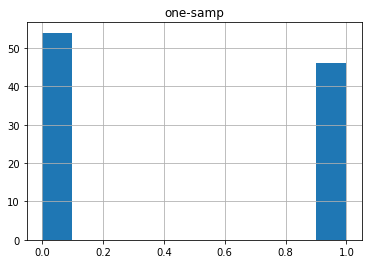

In [0]:
# Plot histogram to look at distribution of a single coin flip 
df. hist();

Text(0.5, 1.0, 'Distribution of 3000 sample means \n (of 30 coinflips each)')

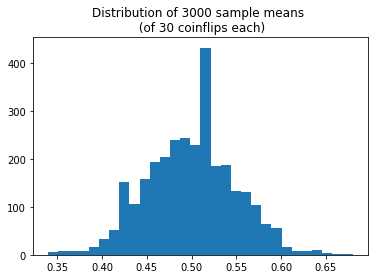

In [0]:
# Plot histogram to look at distribution of all coin flips
ax = plt.hist(sample_means, bins = 30)
plt.title(f'Distribution of {N} sample means \n (of 30 coinflips each)')

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

In [0]:
import numpy as np
import pandas as pd

# Average Height
mu = 70
sigma = 3

lambda_heights = np.random.normal(mu, sigma, 2000)
print(len(lambda_heights))
lambda_heights

2000


array([71.03530513, 71.61592944, 67.49641508, ..., 71.90471463,
       73.32072747, 72.89124846])

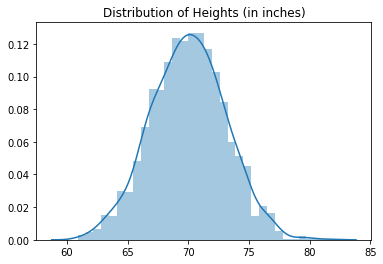

In [0]:
import seaborn as sns

sns.distplot(lambda_heights)
plt.title('Distribution of Heights (in inches)');

In [0]:
print("Population Mean:", lambda_heights.mean())
print("Population Standard Deviation:", lambda_heights.std())

Population Mean: 70.0013215972053
Population Standard Deviation: 3.0776400093792056


In [0]:
population = pd.DataFrame({'heights': lambda_heights})
print(population.shape)
population.head()

(2000, 1)


,heights
0,71.035305
1,71.615929
2,67.496415
3,73.862177
4,71.052172


In [0]:

# Take a random sample and print sample mean
sample1 = population.sample(100)
print(sample1.shape)
sample1.head()

(100, 1)


,heights
969,67.283614
1216,70.886242
1250,68.607866
12,69.897287
1394,69.235126


In [0]:
print('Sample Mean #1:', sample1['heights'].mean())

Sample Mean #1: 70.2958573317429


In [0]:
# Take a different random sample and print sample mean
sample2 = population.sample(100)
print(sample1.shape)
sample2.head()

(100, 1)


,heights
371,68.495063
362,70.884872
1090,74.603995
958,72.909523
1321,69.654411


In [0]:
print('Sample Mean #2:', sample2['heights'].mean())

Sample Mean #2: 69.87512202348807


## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
coinflips_10000 = np.random.binomial(n=1, p=0.5, size=10000)


sample_std = np.std(coinflips_10000) #little s in formula above
print('Sample Standard Deviation', sample_std)

sample_size = len(coinflips_10000) #This is the n
print('Sample Size:', sample_size)

Sample Standard Deviation 0.49999215993853346
Sample Size: 10000


In [0]:
standard_error = sample_std/np.sqrt(sample_size)

print(standard_error)

0.004999921599385335


### What confidence level do we want our confidence interval to represent?

95% confidence Interval? 99% confidence interval? 

In [0]:
import scipy.stats as stats
#getting to the t in the formula
#95% is usually the default
t = stats.t.ppf(0.975, sample_size-1)     #t-statistic: left tail is usually 0, going right, it will increase in value (up to 1). 95% confidence interval is 0.975
t

NameError: ignored

In [0]:
sample_mean = coinflips_10000.mean()
confidence_interval = (sample_mean - t*standard_error, sample_mean + t*standard_error) #(lower bound, upper bound)
margin_of_error = t*standard_error
print("Sample Mean: ", sample_mean)
print("Margin of Error: ", margin_of_error)
print("Confidence Interval: ", confidence_interval)  #meaning if you ran the experiment 100 times, 95% of them would fall within the bounds of the CI

Sample Mean:  0.5028
Margin of Error:  0.009800852637122852
Confidence Interval:  (0.4929991473628772, 0.5126008526371229)


## Graphically Represent a Confidence Interval

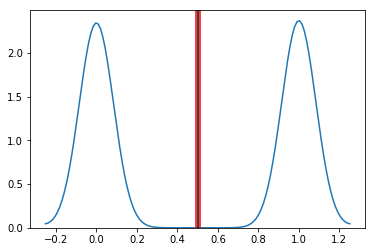

In [0]:
import seaborn as sns

sns.kdeplot(coinflips_10000)
plt.axvline(x=sample_mean, color='k')
plt.axvline(x=confidence_interval[0], color='r')
plt.axvline(x=confidence_interval[1], color='r')


## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [0]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.5, 0.4666666666666667, 0.5, 0.6, 0.5, 0.4666666666666667, 0.5333333333333333, 0.4666666666666667, 0.5, 0.5666666666666667, 0.5333333333333333, 0.6, 0.7333333333333333, 0.4666666666666667, 0.5, 0.43333333333333335, 0.5666666666666667, 0.6, 0.4666666666666667, 0.43333333333333335, 0.5, 0.5, 0.4666666666666667, 0.5666666666666667, 0.4, 0.36666666666666664, 0.5666666666666667, 0.5333333333333333, 0.43333333333333335, 0.43333333333333335, 0.4, 0.5, 0.5666666666666667, 0.43333333333333335, 0.3333333333333333, 0.43333333333333335, 0.23333333333333334, 0.5, 0.4666666666666667, 0.5333333333333333, 0.4666666666666667, 0.6, 0.43333333333333335, 0.5333333333333333, 0.36666666666666664, 0.43333333333333335, 0.36666666666666664, 0.5666666666666667, 0.5, 0.5, 0.5, 0.6333333333333333, 0.6666666666666666, 0.26666666666666666, 0.5333333333333333, 0.6333333333333333, 0.5, 0.4666666666666667, 0.5666666666666667, 0.4, 0.4666666666666667, 0.5, 0.4, 0.7, 0

In [0]:
np.mean(coinflip_means)

0.5023333333333333

In [0]:
#computing 95% confidence interval
t_stat = stats.t.ppf(0.975, 99)
print('T Statistic: ', t_stat) 

std_sample = np.std(coinflip_means)
std_err = std_sample/np.sqrt(len(coinflip_means))

CI = stats.t.interval(0.95, 99, loc=np.mean(coinflip_means), scale=std_err)
print('95% confidence interval:', CI)

T Statistic:  1.9842169515086827
95% confidence interval: (0.4844813834224666, 0.5201852832442)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
ttest_1samp(coinflip_means, 0.484) #testing to see if = to 0.5

#we can see that the pvalue > .5, so we won't reject the null hypothesis

#if we use values close to the confidence interval bounds, we're close to rejecting the null hypothesis

Ttest_1sampResult(statistic=2.0275077736724865, pvalue=0.04529796837489776)

A null hypothesis that's just outside of our confidence interval == reject



In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

#Chi-squared tests runs on categorical data - Wikipedia has an in-depth explanation

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


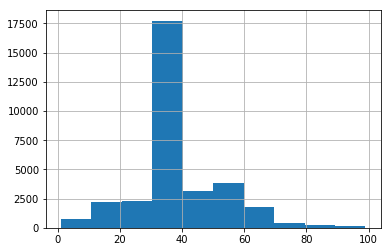

In [0]:
df['hours-per-week'].hist()

In [0]:
df.describe(exclude='number')
#is sex independent to number hours worked (hours-per-week)?

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
cut_points = [0, 9, 19, 29, 39, 49, 300]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)
df['hours_per_week_categories'].value_counts()

#Is gender and number of hours worked independent from each other?

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [0]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
df = df.sort_values(by='hours_per_week_categories')
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [0]:
total = contingency_table.loc['All', 'All']
total

32561

In [0]:
expected = []

for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)
print(expected)

#for females 0-9 we expect 151, males expect 306, for females 50+ expected is 2137, males is 4324

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [0]:
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [0]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [0]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

2287.190943926107

## Run a $\chi^{2}$ Test using Scipy

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(chi_squared, p_value, dof, expected)

2287.190943926107 0.0 5 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex. 

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_1samp, ttest_ind, ttest_ind_from_stats, ttest_rel, chisquare, normaltest
import scipy.stats as stats

In [0]:
# TODO - your code!
#Load Data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

In [0]:
#Read/View Data
col_names = [
    'Party', 
    'handicapped-infants',
 'water-project-cost-sharing',
 'budget-resolution',
'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation',
 'education-spending',
 'right-to-sue',
 'crime',
 'duty-free-exports',
 'export-admin-S-Africa',
]

data = pd.read_csv("house-votes-84.data", header=None, names=col_names)
pd.options.display.max_columns = None
vote_map = {'y': 1, 'n': 0, '?': 0.5}
data = data.replace(vote_map)


print(data.shape)
print(data.head())

(435, 17)
        Party  handicapped-infants  water-project-cost-sharing  \
0  republican                  0.0                         1.0   
1  republican                  0.0                         1.0   
2    democrat                  0.5                         1.0   
3    democrat                  0.0                         1.0   
4    democrat                  1.0                         1.0   

   budget-resolution  physician-fee-freeze  el-salvador-aid  \
0                0.0                   1.0              1.0   
1                0.0                   1.0              1.0   
2                1.0                   0.5              1.0   
3                1.0                   0.0              0.5   
4                1.0                   0.0              1.0   

   religious-groups-in-schools  anti-satellite-test-ban  aid-to-contras  \
0                          1.0                      0.0             0.0   
1                          1.0                      0.0         

In [0]:
data.isna().sum()

In [0]:
dems = data[data['Party'] == 'democrat']
reps = data[data['Party'] == 'republican']
bills = data.columns[1:]

In [0]:
'''Confidence Intervals:

    Generate and numerically represent a confidence interval
    Graphically (with a plot) represent the confidence interval
    Interpret the confidence interval - what does it tell you about the data and its distribution?

'''



In [0]:
budget = data['budget-resolution']    #Get the population

# Take a random sample and get sample mean
sample = budget.sample(200)    
sample_mean = np.mean(sample)

#store sample size in var
sample_size = len(sample)
print(f'Sample Size is: {sample_size}')

#confirm ideal CI (.975 for 95%)
t = stats.t.ppf(0.975, sample_size-1) 

#Get Standard Deviation
sample_std = np.std(sample)
print(f'Sample standard deviation is: {sample_std}')

#find standard error
sample_standard_error = sample_std/np.sqrt(sample_size)
print(f'Sample std error is: {sample_standard_error}')


confidence_interval = (sample_mean - t*sample_standard_error, sample_mean + t*sample_standard_error) #(lower bound, upper bound)
margin_of_error = t*sample_standard_error
print("Sample Mean: ", sample_mean)
print("Margin of Error: ", margin_of_error)
print("Confidence Interval: ", confidence_interval)  #meaning if you ran the experiment 100 times, 95% of them would fall within the bounds of the CI




Sample Size is: 200
Sample standard deviation is: 0.4850193295117214
Sample std error is: 0.03429604569042907
Sample Mean:  0.5775
Margin of Error:  0.06763031174111787
Confidence Interval:  (0.5098696882588821, 0.6451303117411179)


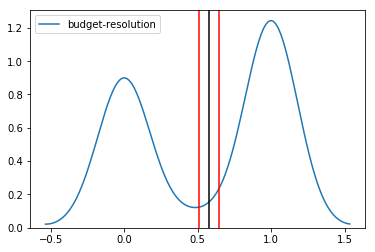

In [0]:
import seaborn as sns

sns.kdeplot(sample)
plt.axvline(x=sample_mean, color='k')
plt.axvline(x=confidence_interval[0], color='r')
plt.axvline(x=confidence_interval[1], color='r')


## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>


In [0]:
'''
Chi-squared tests:

    Take a dataset that we have used in the past in class that has categorical variables. 
    Pick two of those categorical variables and run a chi-squared tests on that data
        By hand using Numpy
        In a single line using Scipy'''

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_1samp, ttest_ind, ttest_ind_from_stats, ttest_rel, chisquare, normaltest
import scipy.stats as stats

In [1]:
!wget https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD

--2019-08-12 04:55:55--  https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD
Resolving data.cdc.gov (data.cdc.gov)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cdc.gov (data.cdc.gov)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [  <=>               ] 779.62K  2.25MB/s    in 0.3s    

2019-08-12 04:55:56 (2.25 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [798329]



In [19]:
NCHS = pd.read_csv('/content/rows.csv?accessType=DOWNLOAD')

print(NCHS.shape)

all_causes = NCHS[NCHS['Cause Name'] == 'All causes']

all_causes.sort_values(by='Year').head(10)

(10296, 6)


,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10295,1999,All Causes,All causes,District of Columbia,6076,1087.3
9881,1999,All Causes,All causes,California,229380,802.3
10112,1999,All Causes,All causes,Wyoming,4042,895.4
10114,1999,All Causes,All causes,Pennsylvania,130283,896.4
9878,1999,All Causes,All causes,Colorado,27114,801.8
10131,1999,All Causes,All causes,Illinois,108436,905.1
10136,1999,All Causes,All causes,Maryland,43089,907.0
10159,1999,All Causes,All causes,Michigan,87232,916.4
9459,1999,All Causes,All causes,Hawaii,8270,688.8
10100,1999,All Causes,All causes,Virginia,55320,889.6


In [0]:
all_causes['Age-adjusted Death Rate'].sort_index()

## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
aadr_bins = [0, 599, 699, 799, 899, 999, 1099]
aadr_names = ['0-500', '500-600', '600-700', '800-900', '900-1000', '1000+']

all_causes['Age-adjusted Death Rate'] = pd.cut(all_causes['Age-adjusted Death Rate'], aadr_bins, labels=aadr_names)
print(all_causes['Age-adjusted Death Rate'].shape)




In [34]:
contingency_table1 = pd.crosstab(NCHS['Year'], all_causes['Age-adjusted Death Rate'], margins=True)
print(contingency_table1.shape)
contingency_table1

(19, 7)


Age-adjusted Death Rate,0-500,500-600,600-700,800-900,900-1000,1000+,All
Year,,,,,,,
1999,0,1,4,28,13,6,52
2000,0,1,8,25,13,5,52
2001,0,1,10,24,12,5,52
2002,0,1,13,22,11,5,52
2003,0,1,18,18,11,4,52
2004,0,1,26,14,11,0,52
2005,0,2,21,17,9,3,52
2006,0,2,29,12,8,1,52
2007,0,6,27,10,9,0,52


In [45]:
contingency_table1.iloc[0:18, 6].values

array([52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
       52])

In [46]:
row_sums = contingency_table1.iloc[:18, 6].values
col_sums = contingency_table1.iloc[18, :6].values
print(row_sums)
print(col_sums)

[52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52]
[  7 113 394 248 145  29]


In [0]:
total = contingency_table1.loc['All', 'All']

In [49]:
expected = []

for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)
print(expected)

(18, 6)
[[ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.

In [0]:
observed = pd.crosstab(NCHS['Year'], all_causes['Age-adjusted Death Rate']).values
print(observed.shape)
observed

In [53]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

261.357644316674

In [57]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f'This is the chi squared number: {chi_squared}.\nThis is the p-value: {p_value}.\nThis is the degrees of freedom: {dof}.\nThis is the crosstab: {expected}')

This is the chi squared number: 261.357644316674.
This is the p-value: 7.91438150904148e-20.
This is the degrees of freedom: 85.
This is the crosstab: [[ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.27777778 21.88888889 13.77777778  8.05555556  1.61111111]
 [ 0.38888889  6.2777777

## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)